# [실습 Quiz 04-19] Keras를 이용한 손글씨 분류하기

## MNIST 훈련데이터 준비하기

In [42]:
import numpy as np

In [43]:
import tensorflow as tf

In [44]:
# None 을 적정한 코드로 교체하세요
mnist = tf.keras.datasets.mnist   
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [45]:
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


In [46]:
import matplotlib
import matplotlib.pyplot as plt

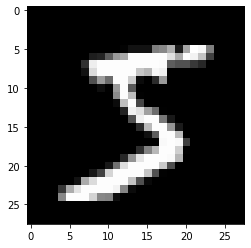

In [47]:
## <샘플이미지 확인하기> 
## 넘파이 배열의 원소값이 0에 가까울수록 이미지가 검게 그려짐. 
## x_train_all[i] 의 i값을 다양하게 입력해 보세요. 0<=i<=59,999
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [48]:
# None 을 적정한 코드로 교체하세요
## <Target 값 확인하기>
## y_target_all : 60,000개의 요소를 가진 1차원 배열. 각 요소는 0~9까지의 정수로 이루어져 있음. 
## 일단 가장 앞에 있는 10개만 출력함.
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [49]:
## 훈련세트의 목표값들이 고르게 분포되어 있는 지 확인함
## bincount() : 배열에 있는 정수값의 등장횟수를 카운트함.
np.bincount(train_labels)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [50]:
# None 을 적정한 코드로 교체하세요
## 이미지 데이터는 픽셀마다 0~255 사이의 값을 가짐.
## [데이터표준화] 255로 나누어 0~1 사이로 맞추는 것이 유리함.
train_images = train_images / 255.0
test_images = test_images / 255.0

## 케라스를 소개합니다.

In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [52]:
# None 을 적정한 코드로 교체하세요
model = Sequential()
# 2차원배열 (28*28픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원배열로 변환함
model.add(Flatten(input_shape=(28,28)))
## 은닉층을 정의함. 유닛개수 100개
model.add(Dense(100, activation='relu'))
## 출력층을 정의함. 유닛수는 10개
model.add(Dense(10, activation='softmax'))

In [53]:
## 최적화알고리즘은 adam, 손실함수는 크로스엔트로피, metrics : 훈련과정기록으로 정확도를 남기기 위함.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
# None 을 적정한 코드로 교체하세요
## 훈련세트에서 측정한 값들을 History 클래스 객체에 담아서 반환함.
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4491 - accuracy: 0.8725
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1275 - accuracy: 0.9632
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9749
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9814
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - accuracy: 0.9853
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0176 - accuracy: 0.9957
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [55]:
## history 딕셔너리의 측정지표들
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


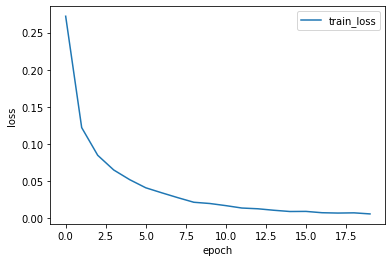

In [56]:
## 손실 추이
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

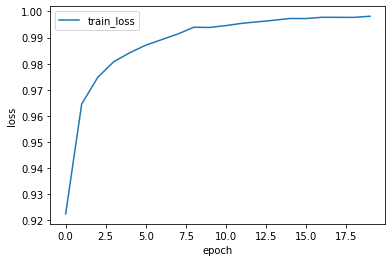

In [57]:
## 정확도 추이
plt.plot(history.history['accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

In [58]:
## Verbosity mode.0 = silent, 1 = progress bar
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

In [59]:
print(f'테스트 손실도 : {test_loss}')

테스트 손실도 : 0.10928843915462494


In [60]:
# None 을 적정한 코드로 교체하세요
print(f'테스트 정확도 : {test_accuracy}')

테스트 정확도 : 0.9764999747276306


In [67]:
# None 을 적정한 코드로 교체하세요
# Step04. 테스트용 데이터를 대입했을 때, 맞추지 못한 항목에 대해 상세 보고한다.
# (1) 맞추지 못한 갯수
# (2) 맞추지 못한 항목 : 인덱스, 예측한 숫자값, 실제 숫자값

def report_model_miss(model, X, Y):
    
    hit = 0
    miss = 0
    nCnt = 0
    misses = []

    predictions = model.predict(test_images)

    for i in range(len(Y)):
      prediction = np.argmax(predictions[i])
      if prediction == Y[i]:
        hit += 1
      else:
        miss += 1
        miss_item = [i, prediction, Y[i]]
        misses.append(miss_item)
    
    score = hit/len(X)*100        
    print(f'Score is {score}')
       
    print(f'The number of miss: {miss}')
    for i in range(len(misses)):
      print(f'[{misses[i][0]+1}] (예측값){misses[i][1]} (실제값){misses[i][2]}')

      digit_image = X[i].reshape(28, 28)
      plt.imshow(digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
      plt.axis("off")
      plt.show()   


Score is 97.65
The number of miss: 235
[63] (예측값)8 (실제값)9


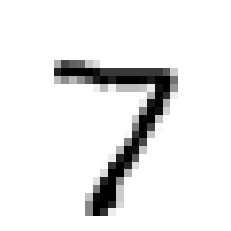

[116] (예측값)9 (실제값)4


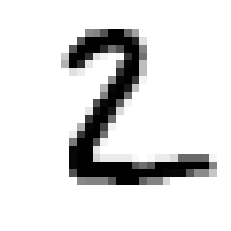

[218] (예측값)5 (실제값)6


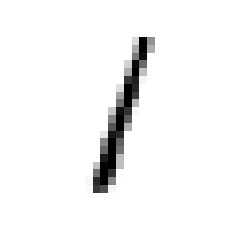

[248] (예측값)2 (실제값)4


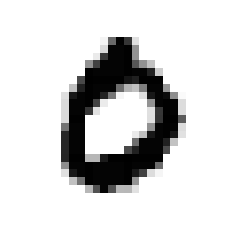

[275] (예측값)3 (실제값)9


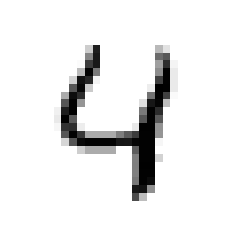

[322] (예측값)7 (실제값)2


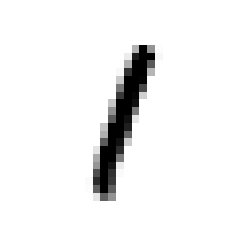

[341] (예측값)3 (실제값)5


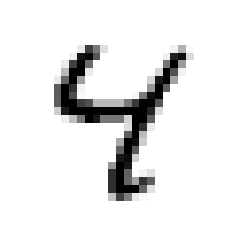

[382] (예측값)7 (실제값)3


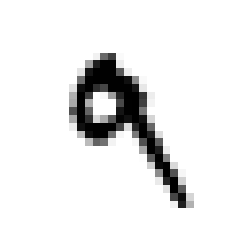

[446] (예측값)0 (실제값)6


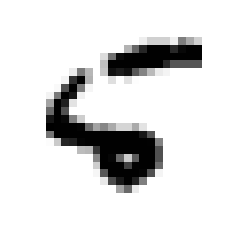

[496] (예측값)0 (실제값)8


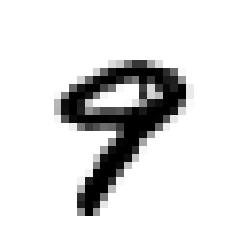

[592] (예측값)3 (실제값)8


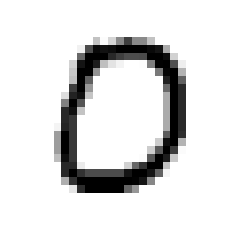

[611] (예측값)2 (실제값)4


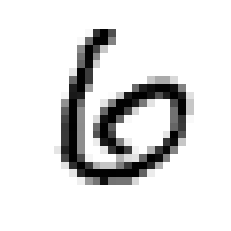

[620] (예측값)8 (실제값)1


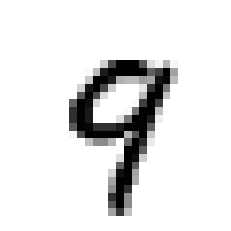

[685] (예측값)3 (실제값)7


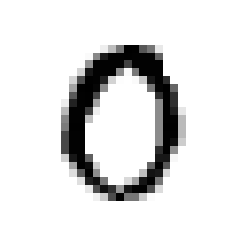

[721] (예측값)8 (실제값)5


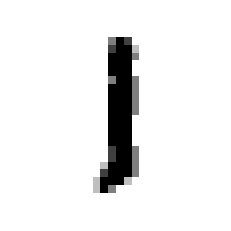

[741] (예측값)9 (실제값)4


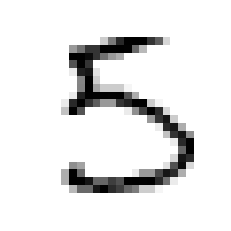

[840] (예측값)3 (실제값)8


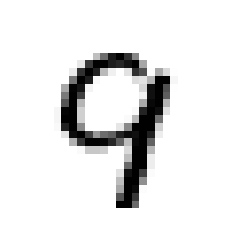

[877] (예측값)3 (실제값)8


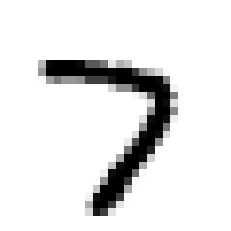

[901] (예측값)3 (실제값)1


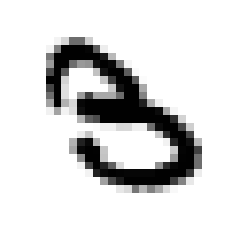

[948] (예측값)9 (실제값)8


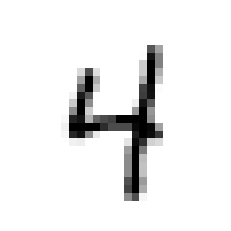

[952] (예측값)4 (실제값)5


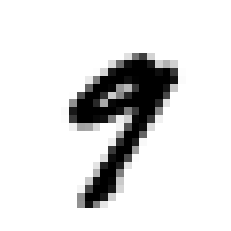

[957] (예측값)2 (실제값)1


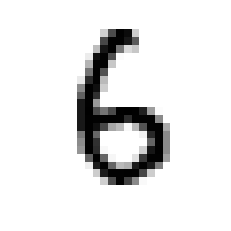

[966] (예측값)0 (실제값)6


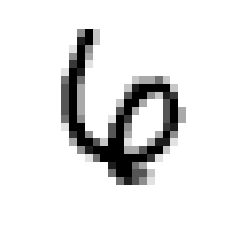

[1015] (예측값)5 (실제값)6


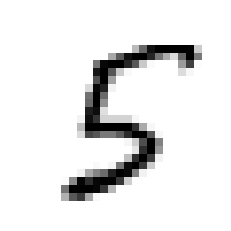

[1040] (예측값)3 (실제값)7


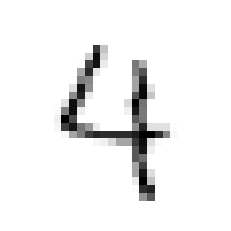

[1113] (예측값)6 (실제값)4


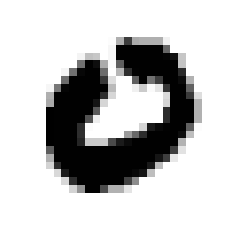

[1129] (예측값)7 (실제값)3


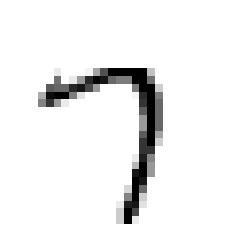

[1179] (예측값)0 (실제값)4


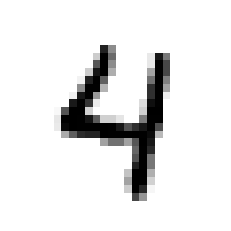

[1182] (예측값)1 (실제값)6


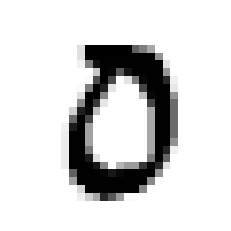

[1183] (예측값)5 (실제값)6


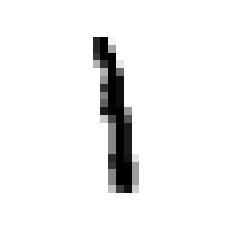

[1195] (예측값)9 (실제값)7


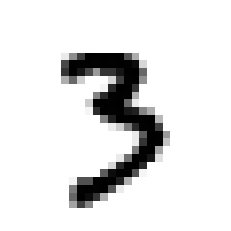

[1227] (예측값)2 (실제값)7


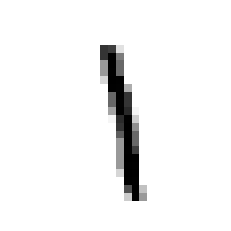

[1243] (예측값)9 (실제값)4


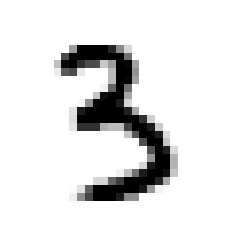

[1248] (예측값)5 (실제값)9


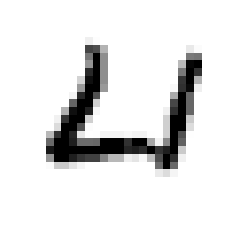

[1320] (예측값)3 (실제값)8


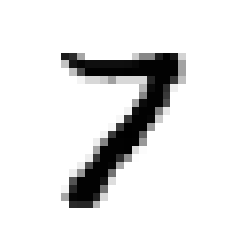

[1338] (예측값)6 (실제값)2


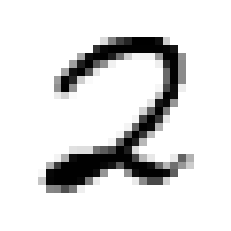

[1394] (예측값)3 (실제값)5


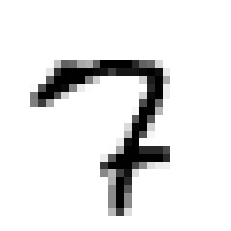

[1396] (예측값)3 (실제값)2


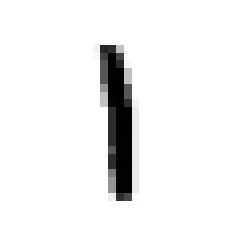

[1415] (예측값)7 (실제값)9


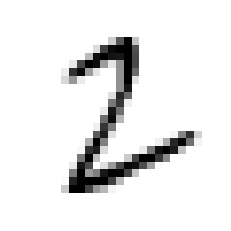

[1523] (예측값)9 (실제값)7


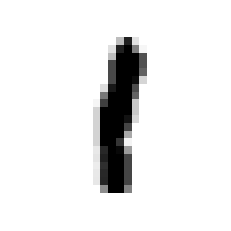

[1550] (예측값)2 (실제값)4


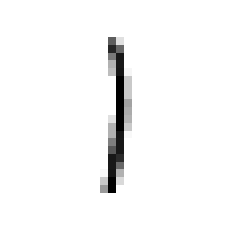

[1554] (예측값)3 (실제값)9


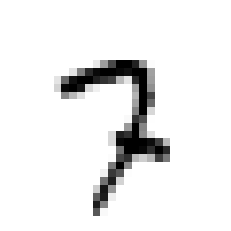

[1610] (예측값)6 (실제값)2


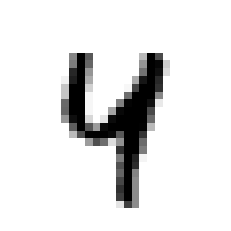

[1655] (예측값)3 (실제값)2


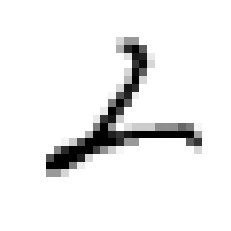

[1672] (예측값)3 (실제값)7


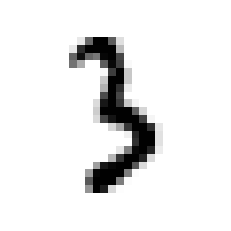

[1682] (예측값)7 (실제값)3


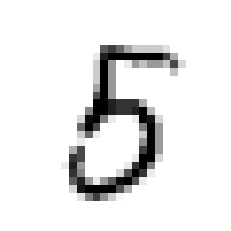

[1710] (예측값)3 (실제값)9


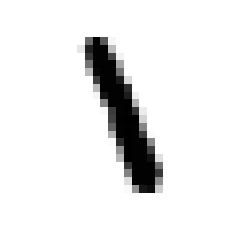

[1718] (예측값)0 (실제값)8


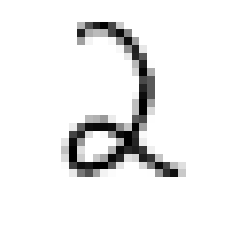

[1801] (예측값)2 (실제값)6


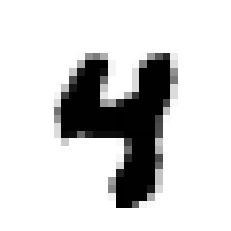

[1879] (예측값)3 (실제값)8


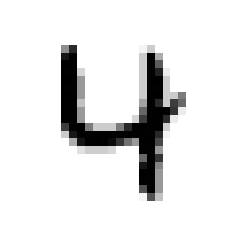

[1902] (예측값)4 (실제값)9


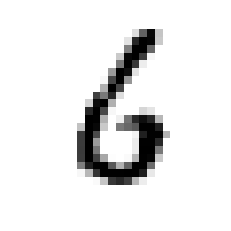

[1904] (예측값)2 (실제값)7


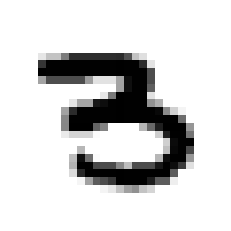

[1910] (예측값)7 (실제값)1


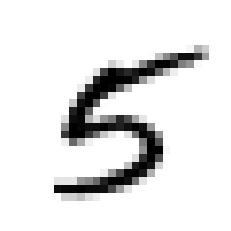

[1942] (예측값)8 (실제값)7


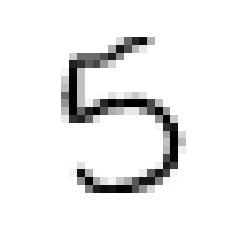

[1974] (예측값)3 (실제값)8


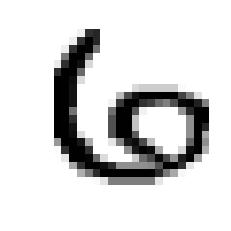

[1983] (예측값)5 (실제값)6


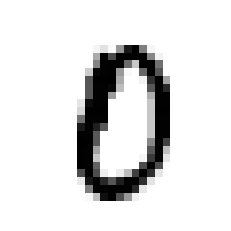

[1985] (예측값)0 (실제값)2


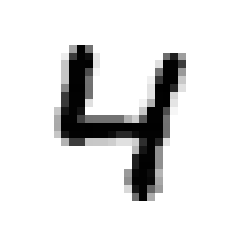

[2005] (예측값)9 (실제값)8


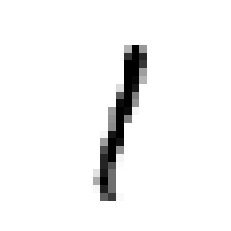

[2017] (예측값)2 (실제값)7


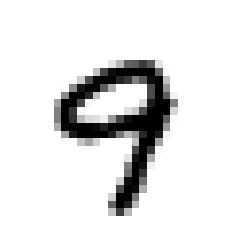

[2025] (예측값)9 (실제값)7


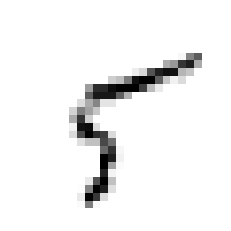

[2034] (예측값)4 (실제값)0


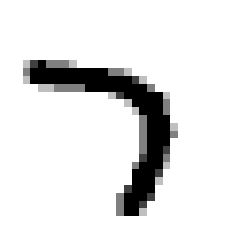

[2044] (예측값)8 (실제값)4


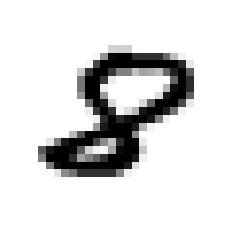

[2045] (예측값)7 (실제값)2


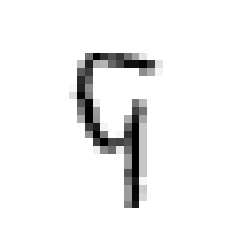

[2054] (예측값)9 (실제값)4


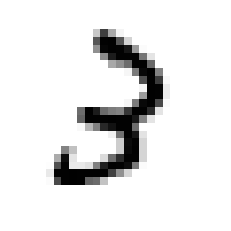

[2110] (예측값)8 (실제값)3


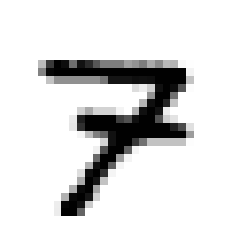

[2119] (예측값)0 (실제값)6


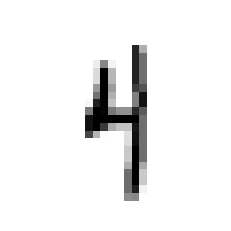

[2131] (예측값)9 (실제값)4


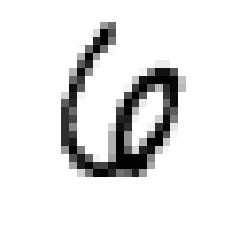

[2136] (예측값)1 (실제값)6


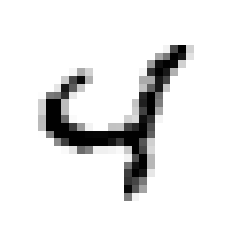

[2183] (예측값)3 (실제값)1


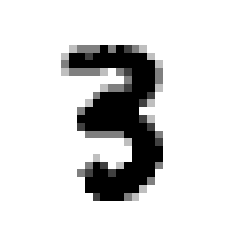

[2225] (예측값)8 (실제값)5


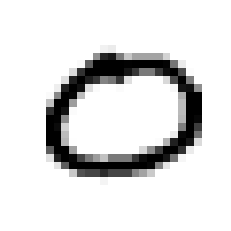

[2273] (예측값)0 (실제값)8


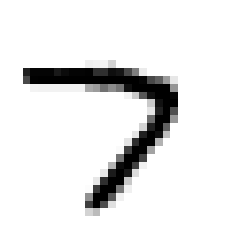

[2292] (예측값)3 (실제값)5


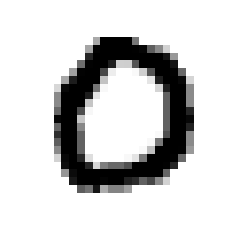

[2293] (예측값)5 (실제값)9


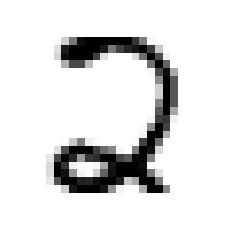

[2294] (예측값)0 (실제값)9


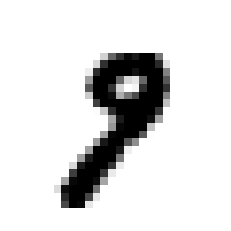

[2327] (예측값)5 (실제값)0


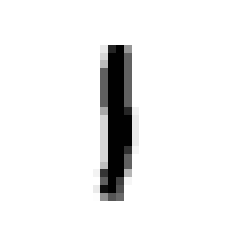

[2330] (예측값)2 (실제값)0


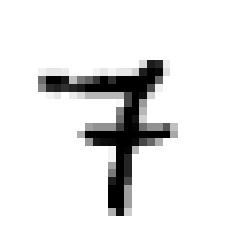

[2370] (예측값)8 (실제값)5


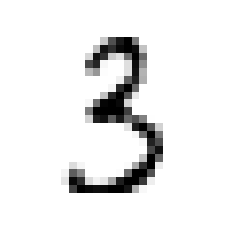

[2388] (예측값)1 (실제값)9


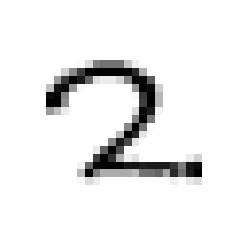

[2394] (예측값)3 (실제값)8


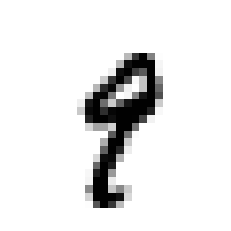

[2396] (예측값)3 (실제값)8


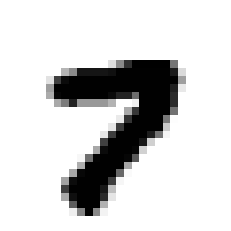

[2407] (예측값)8 (실제값)9


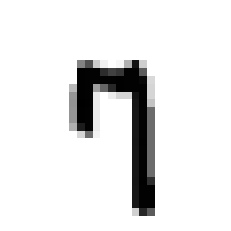

[2415] (예측값)7 (실제값)9


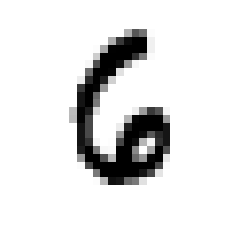

[2463] (예측값)0 (실제값)2


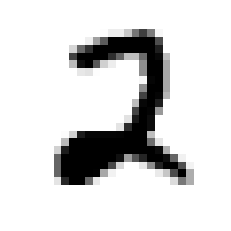

[2489] (예측값)4 (실제값)2


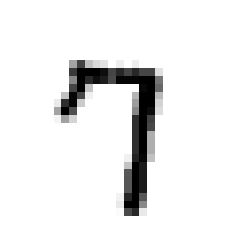

[2583] (예측값)7 (실제값)9


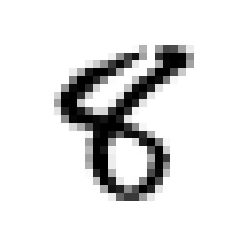

[2598] (예측값)3 (실제값)5


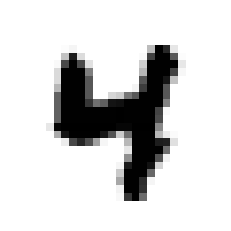

[2608] (예측값)1 (실제값)7


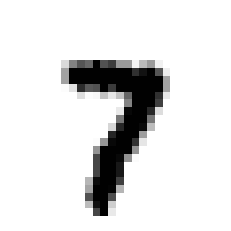

[2649] (예측값)5 (실제값)9


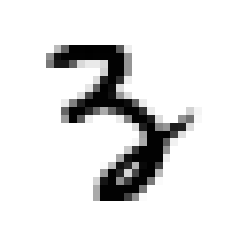

[2655] (예측값)1 (실제값)6


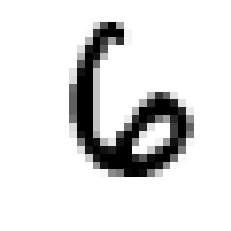

[2811] (예측값)3 (실제값)5


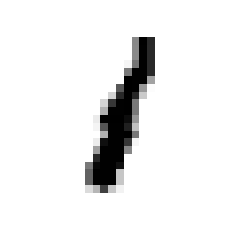

[2878] (예측값)2 (실제값)4


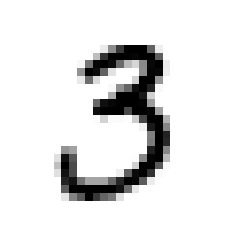

[2897] (예측값)0 (실제값)8


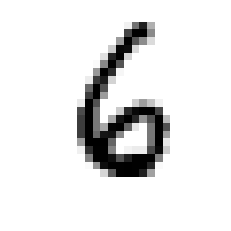

[2916] (예측값)3 (실제값)7


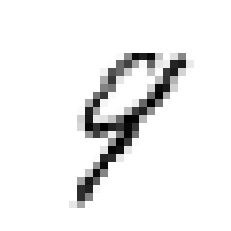

[2922] (예측값)8 (실제값)3


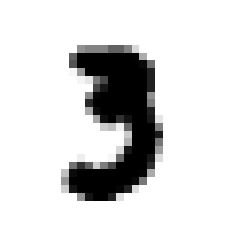

[2940] (예측값)5 (실제값)9


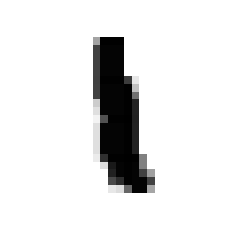

[2954] (예측값)5 (실제값)3


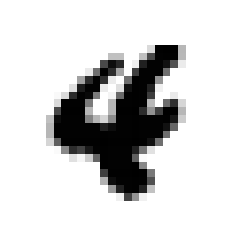

[2971] (예측값)3 (실제값)5


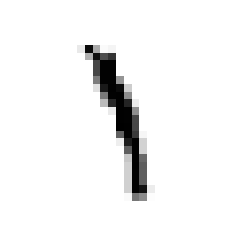

[2976] (예측값)2 (실제값)8


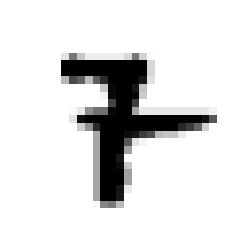

[3024] (예측값)5 (실제값)8


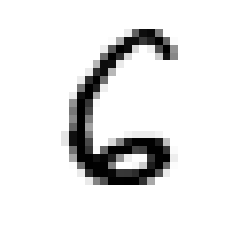

[3061] (예측값)0 (실제값)9


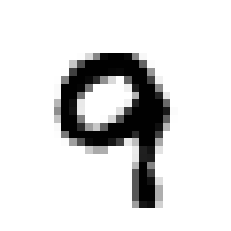

[3063] (예측값)5 (실제값)8


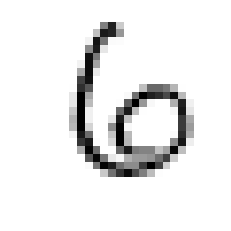

[3074] (예측값)2 (실제값)1


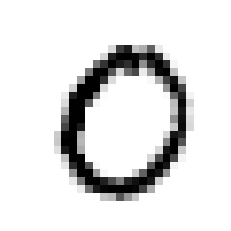

[3118] (예측값)3 (실제값)5


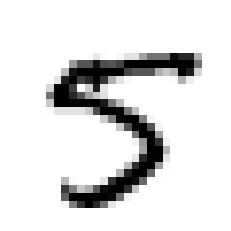

[3131] (예측값)0 (실제값)6


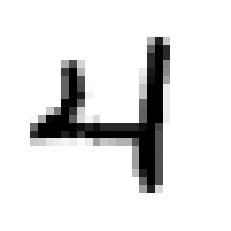

[3219] (예측값)5 (실제값)6


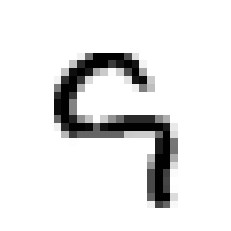

[3290] (예측값)3 (실제값)8


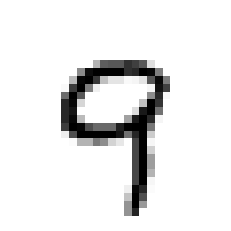

[3376] (예측값)3 (실제값)2


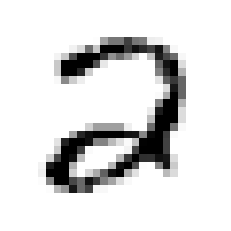

[3406] (예측값)9 (실제값)4


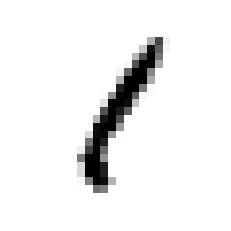

[3423] (예측값)0 (실제값)6


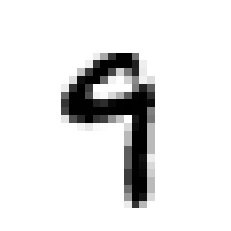

[3452] (예측값)3 (실제값)7


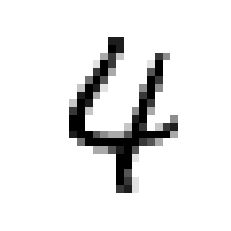

[3476] (예측값)7 (실제값)3


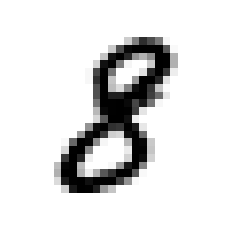

[3504] (예측값)1 (실제값)9


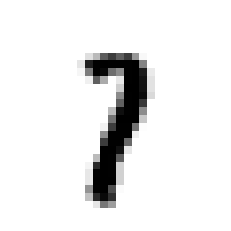

[3521] (예측값)4 (실제값)6


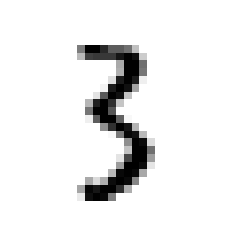

[3550] (예측값)2 (실제값)3


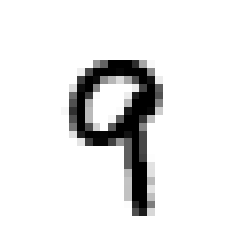

[3559] (예측값)0 (실제값)5


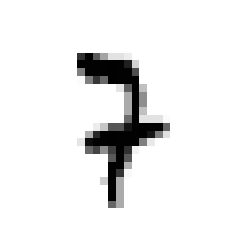

[3560] (예측값)5 (실제값)8


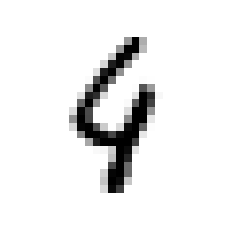

[3568] (예측값)5 (실제값)8


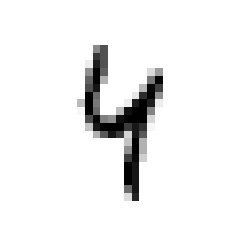

[3598] (예측값)3 (실제값)9


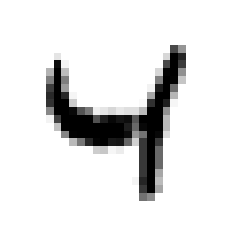

[3728] (예측값)4 (실제값)8


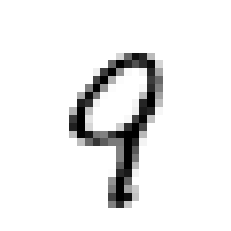

[3750] (예측값)0 (실제값)6


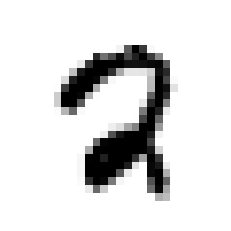

[3752] (예측값)2 (실제값)7


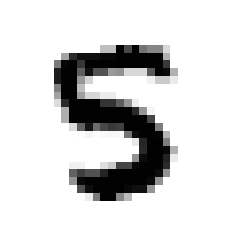

[3763] (예측값)5 (실제값)6


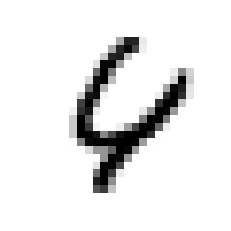

[3768] (예측값)3 (실제값)7


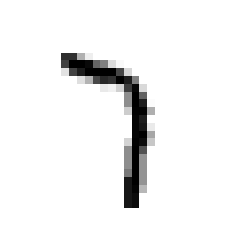

[3797] (예측값)8 (실제값)2


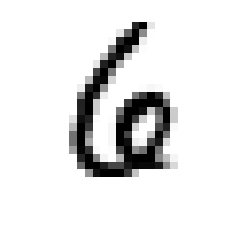

[3812] (예측값)4 (실제값)2


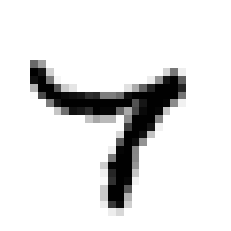

[3819] (예측값)4 (실제값)0


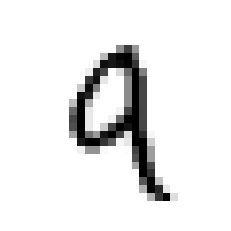

[3839] (예측값)1 (실제값)7


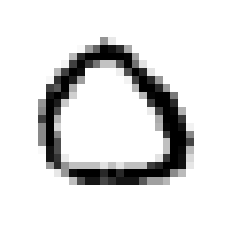

[3854] (예측값)5 (실제값)6


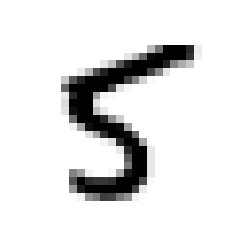

[3894] (예측값)6 (실제값)5


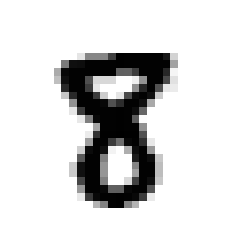

[3903] (예측값)3 (실제값)5


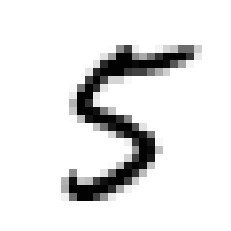

[3907] (예측값)2 (실제값)1


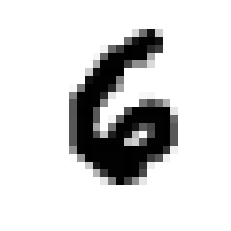

[3942] (예측값)2 (실제값)4


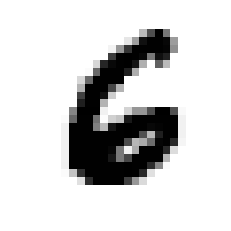

[3944] (예측값)5 (실제값)3


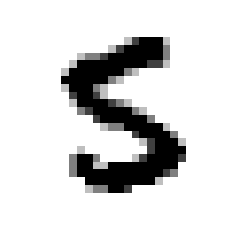

[4001] (예측값)8 (실제값)9


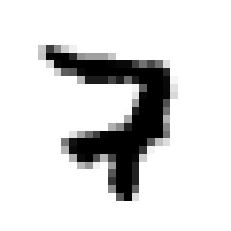

[4066] (예측값)2 (실제값)0


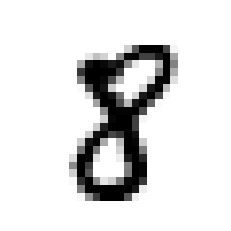

[4076] (예측값)0 (실제값)8


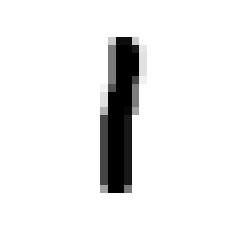

[4079] (예측값)3 (실제값)9


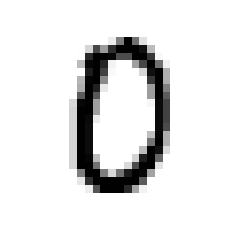

[4124] (예측값)3 (실제값)8


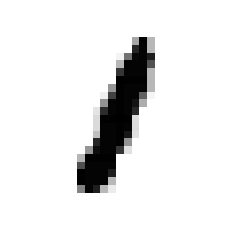

[4164] (예측값)0 (실제값)9


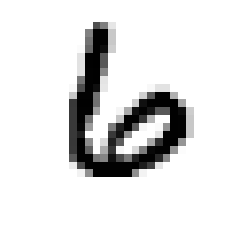

[4200] (예측값)9 (실제값)7


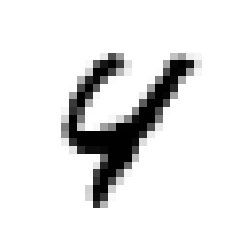

[4202] (예측값)7 (실제값)1


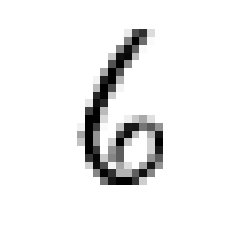

[4249] (예측값)8 (실제값)2


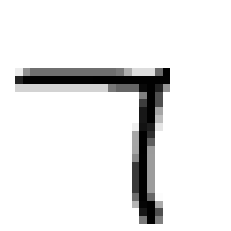

[4290] (예측값)7 (실제값)2


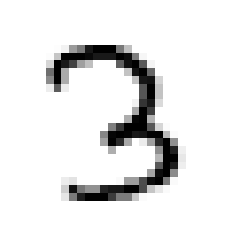

[4295] (예측값)7 (실제값)9


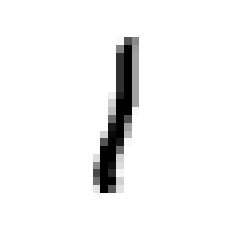

[4361] (예측값)3 (실제값)5


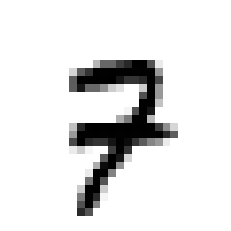

[4370] (예측값)4 (실제값)9


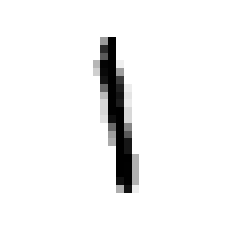

[4426] (예측값)4 (실제값)9


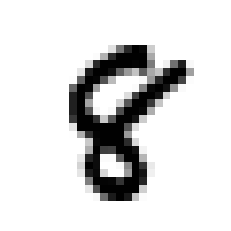

[4498] (예측값)7 (실제값)8


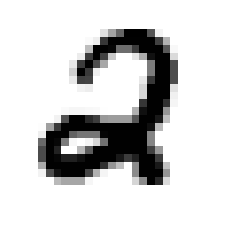

[4505] (예측값)7 (실제값)2


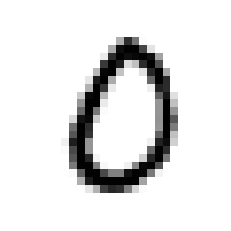

[4506] (예측값)3 (실제값)9


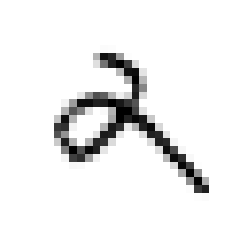

[4552] (예측값)4 (실제값)7


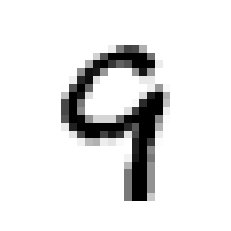

[4602] (예측값)4 (실제값)8


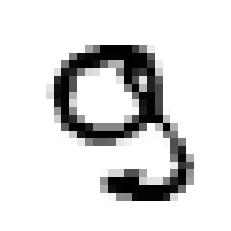

[4672] (예측값)3 (실제값)8


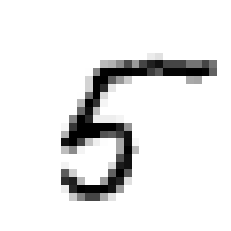

[4732] (예측값)7 (실제값)8


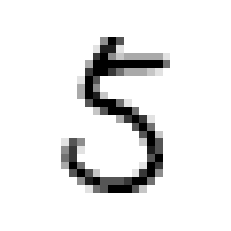

[4808] (예측값)0 (실제값)8


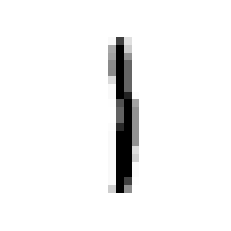

[4824] (예측값)6 (실제값)9


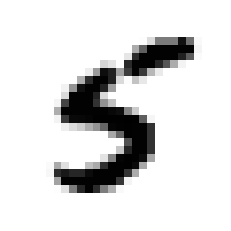

[4839] (예측값)5 (실제값)6


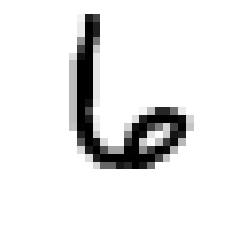

[4861] (예측값)9 (실제값)4


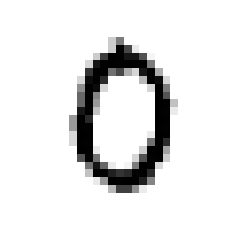

[4881] (예측값)5 (실제값)0


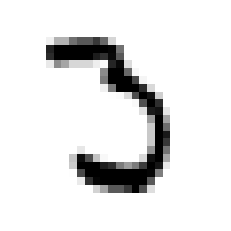

[4891] (예측값)3 (실제값)8


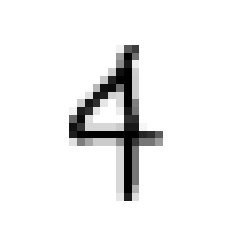

[4979] (예측값)3 (실제값)8


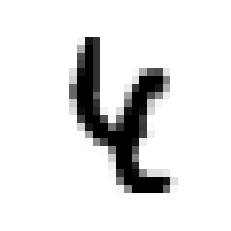

[5204] (예측값)7 (실제값)1


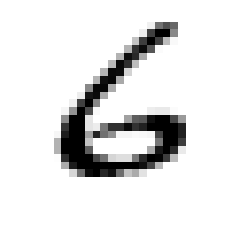

[5266] (예측값)4 (실제값)6


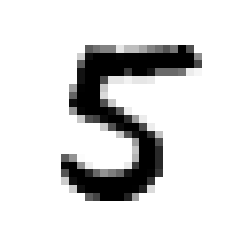

[5332] (예측값)6 (실제값)1


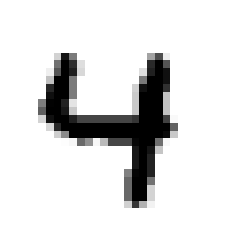

[5458] (예측값)8 (실제값)1


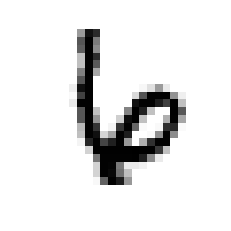

[5643] (예측값)5 (실제값)1


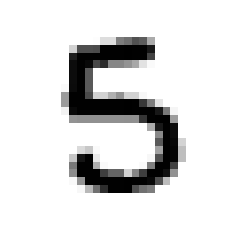

[5677] (예측값)2 (실제값)4


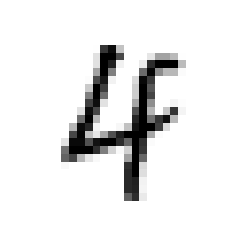

[5750] (예측값)5 (실제값)8


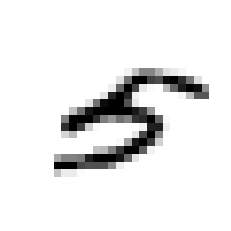

[5888] (예측값)0 (실제값)7


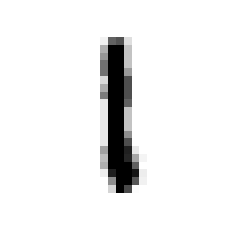

[5937] (예측값)9 (실제값)4


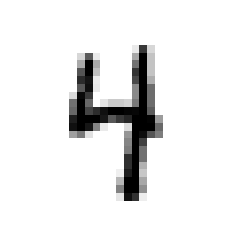

[5938] (예측값)3 (실제값)5


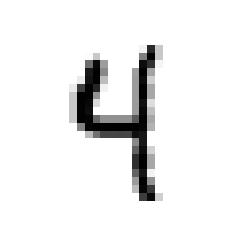

[5973] (예측값)3 (실제값)5


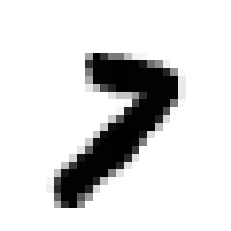

[5974] (예측값)8 (실제값)3


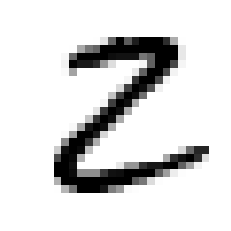

[5983] (예측값)3 (실제값)5


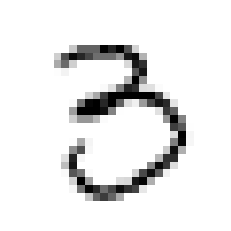

[6036] (예측값)0 (실제값)2


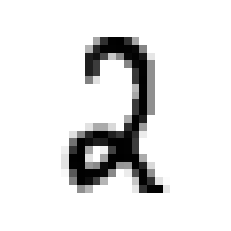

[6167] (예측값)3 (실제값)9


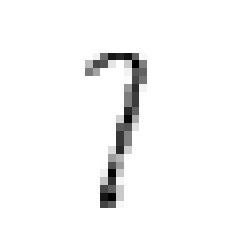

[6392] (예측값)6 (실제값)2


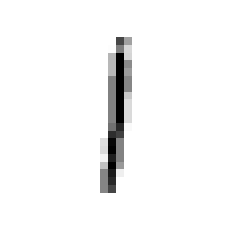

[6417] (예측값)3 (실제값)9


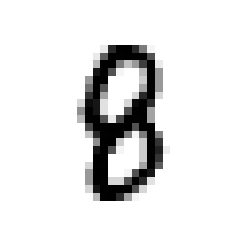

[6533] (예측값)7 (실제값)0


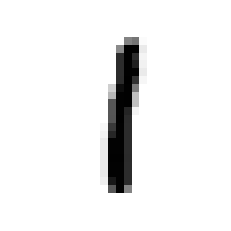

[6556] (예측값)9 (실제값)8


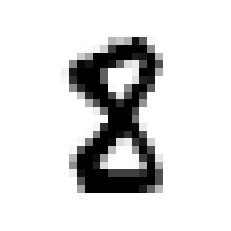

[6559] (예측값)2 (실제값)6


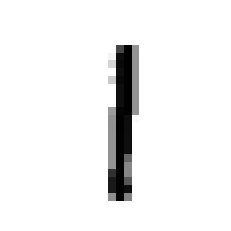

[6561] (예측값)3 (실제값)9


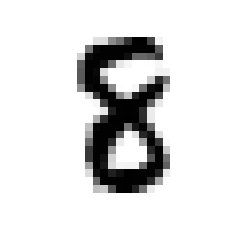

[6572] (예측값)7 (실제값)9


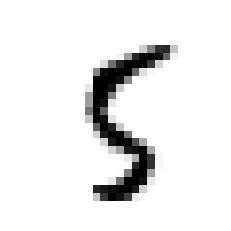

[6575] (예측값)6 (실제값)2


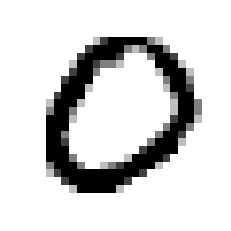

[6577] (예측값)1 (실제값)7


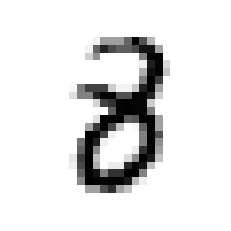

[6591] (예측값)5 (실제값)0


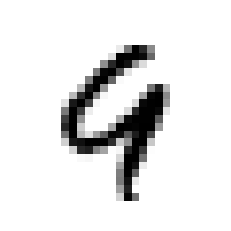

[6598] (예측값)7 (실제값)0


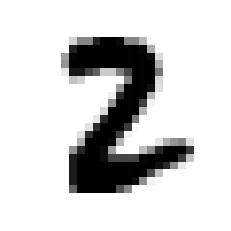

[6609] (예측값)5 (실제값)9


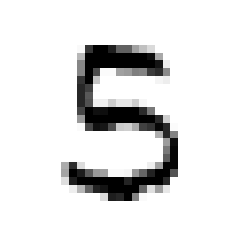

[6626] (예측값)2 (실제값)8


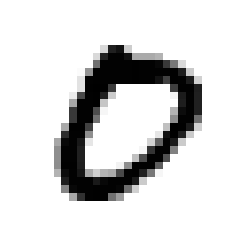

[6633] (예측값)5 (실제값)9


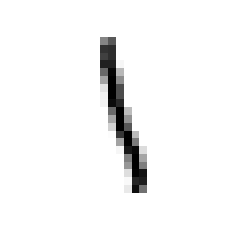

[6652] (예측값)5 (실제값)0


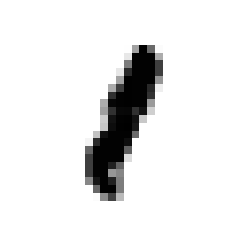

[6756] (예측값)9 (실제값)8


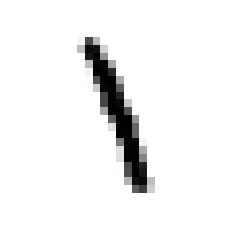

[6840] (예측값)3 (실제값)8


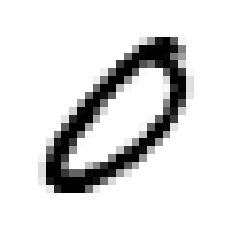

[6848] (예측값)4 (실제값)6


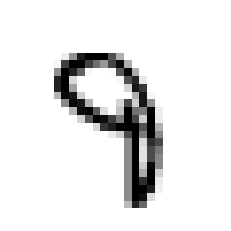

[7183] (예측값)7 (실제값)9


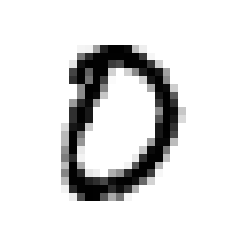

[7187] (예측값)9 (실제값)4


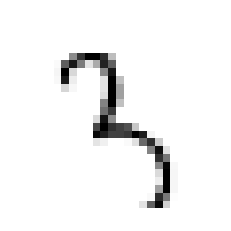

[7217] (예측값)6 (실제값)0


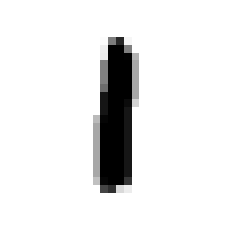

[7435] (예측값)8 (실제값)4


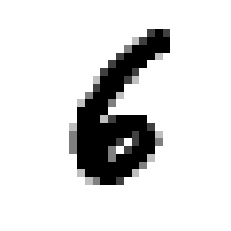

[7824] (예측값)3 (실제값)8


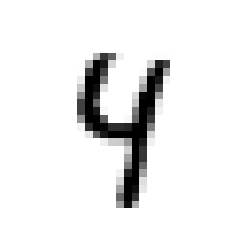

[7922] (예측값)5 (실제값)8


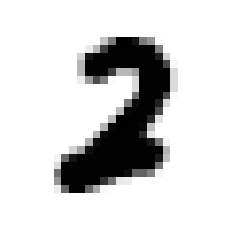

[8021] (예측값)8 (실제값)1


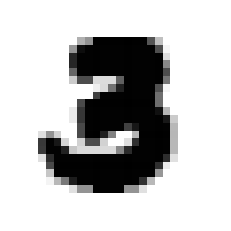

[8199] (예측값)4 (실제값)2


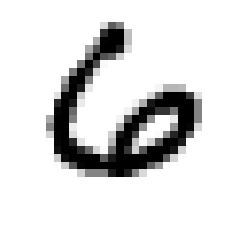

[8247] (예측값)9 (실제값)3


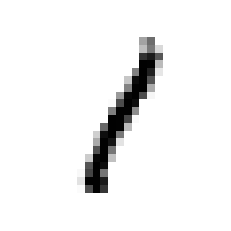

[8256] (예측값)2 (실제값)4


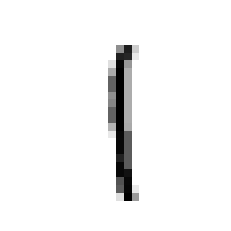

[8312] (예측값)4 (실제값)6


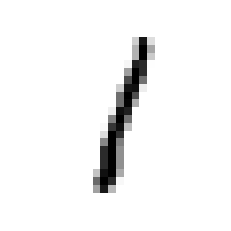

[8326] (예측값)6 (실제값)0


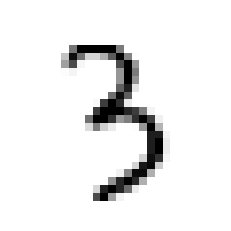

[8354] (예측값)4 (실제값)2


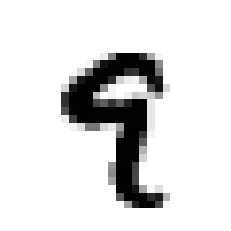

[8409] (예측값)6 (실제값)8


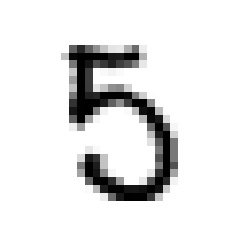

[8457] (예측값)0 (실제값)8


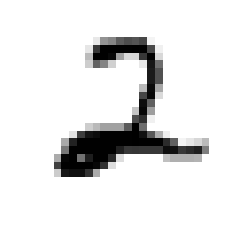

[8520] (예측값)3 (실제값)7


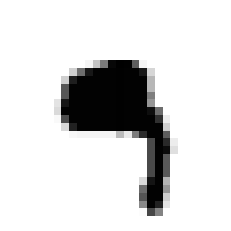

[8521] (예측값)9 (실제값)4


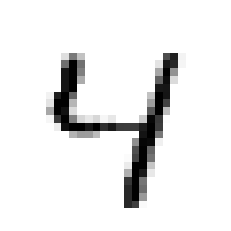

[8523] (예측값)6 (실제값)8


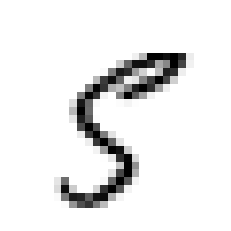

[8528] (예측값)9 (실제값)4


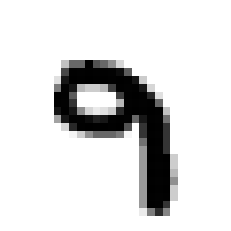

[9010] (예측값)2 (실제값)7


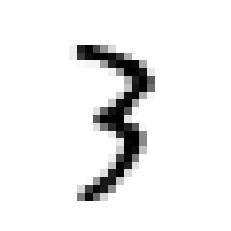

[9025] (예측값)2 (실제값)7


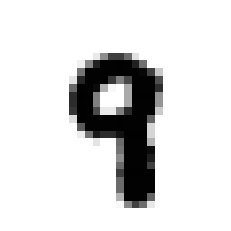

[9254] (예측값)5 (실제값)4


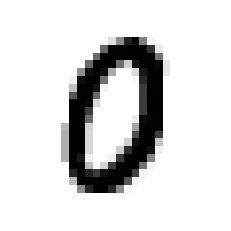

[9281] (예측값)5 (실제값)8


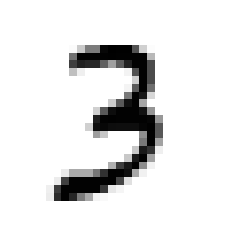

[9588] (예측값)4 (실제값)9


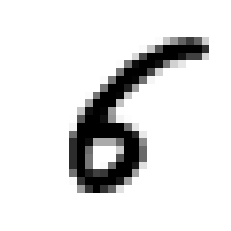

[9635] (예측값)1 (실제값)0


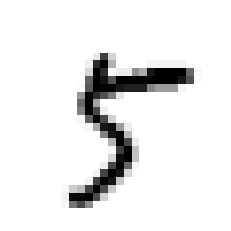

[9665] (예측값)7 (실제값)2


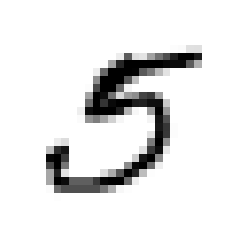

[9670] (예측값)7 (실제값)4


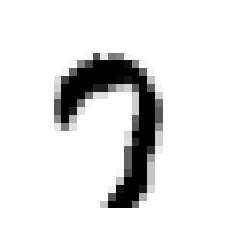

[9680] (예측값)3 (실제값)6


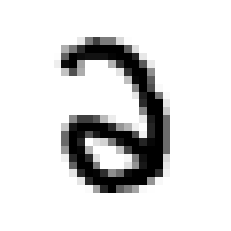

[9693] (예측값)7 (실제값)9


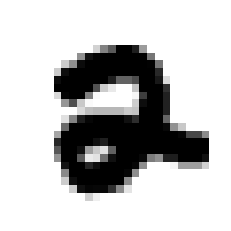

[9699] (예측값)5 (실제값)6


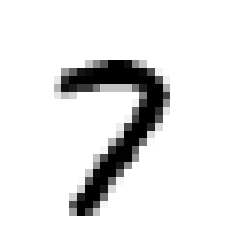

[9717] (예측값)3 (실제값)2


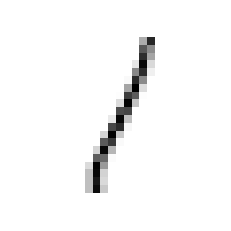

[9727] (예측값)3 (실제값)2


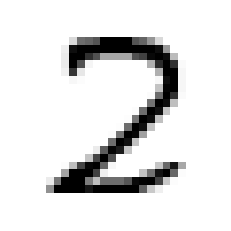

[9730] (예측값)6 (실제값)5


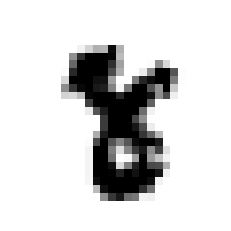

[9734] (예측값)7 (실제값)9


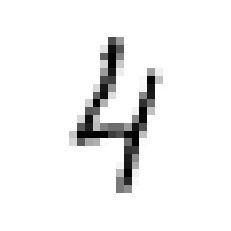

[9746] (예측값)0 (실제값)4


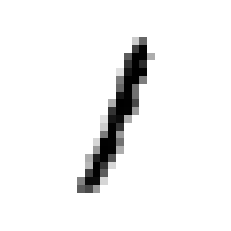

[9756] (예측값)5 (실제값)8


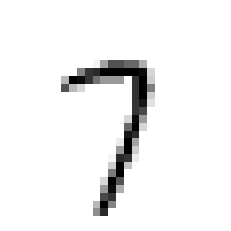

[9769] (예측값)0 (실제값)2


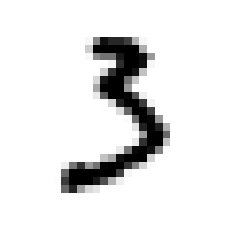

[9771] (예측값)0 (실제값)5


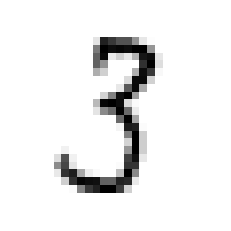

[9784] (예측값)0 (실제값)4


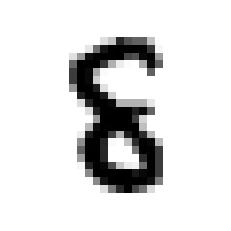

[9794] (예측값)5 (실제값)6


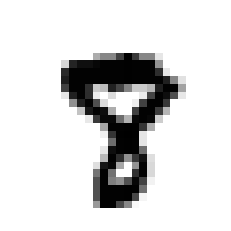

[9840] (예측값)7 (실제값)2


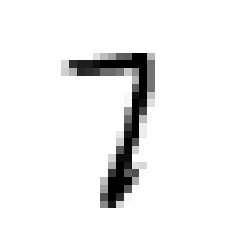

In [68]:
# None 을 적정한 코드로 교체하세요
# Step04. 테스트용 데이터를 대입했을 때, 맞추지 못한 항목에 대해 상세 보고한다.
# (1) 맞추지 못한 갯수
# (2) 맞추지 못한 항목 : 인덱스, 예측한 숫자값, 실제 숫자값
report_model_miss(model,test_images, test_labels)